# <center> **Color Detection** </center>
## <font size=4> **Visión por Computadora 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def get_limits(color, delta):
    C = np.uint8([[color]])
    hsvC = cv.cvtColor(C, cv.COLOR_BGR2HSV)
    
    lowerLimit = hsvC[0][0][0] - delta, 100, 100
    upperLimit = hsvC[0][0][0] + delta, 255, 255

    lowerLimit = np.array(lowerLimit, dtype=np.uint8)
    upperLimit = np.array(upperLimit, dtype=np.uint8)
    return hsvC[0][0], lowerLimit, upperLimit

In [3]:
YELLOW = [0, 200, 255]

color, lowerLimit, upperLimit = get_limits(color=YELLOW, delta=15)
print(color)
print(lowerLimit, upperLimit)

[ 24 255 255]
[  9 100 100] [ 39 255 255]


In [4]:
GREEN = (0, 255, 0)

## Read image

In [5]:
I = cv.imread('bananas.jpeg', cv.IMREAD_COLOR)
Ix = np.asarray(I[:,:,::-1])

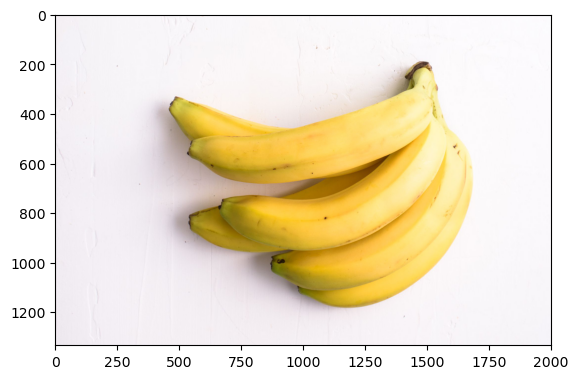

In [6]:
#cv.imshow('Image', I)
#cv.waitKey(3)
#cv.destroyAllWindows()

plt.figure()
plt.imshow(Ix)
plt.show()

## Color Detection

In [7]:
# DETECTOR

hsvI = cv.cvtColor(I, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsvI, lowerLimit, upperLimit)
Mx = np.asarray(mask)
mask_ = Image.fromarray(mask)
bbox = mask_.getbbox()

In [8]:
print(bbox)

(460, 192, 1682, 1184)


In [9]:
# draw a rectangle on original image (if bounding box)
if bbox is not None:
    x1, y1, x2, y2 = bbox
    cv.rectangle(I, (x1, y1), (x2, y2), GREEN, 5)

In [10]:
# convert OpenCV image to numpy (to plot)
result = np.asarray(I[:,:,::-1])

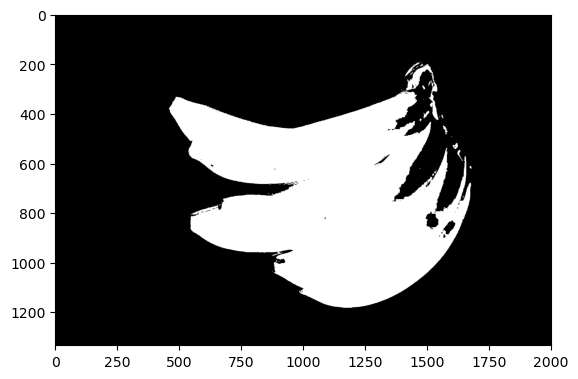

In [11]:
plt.figure()
plt.imshow(Mx, cmap='gray')
plt.show()

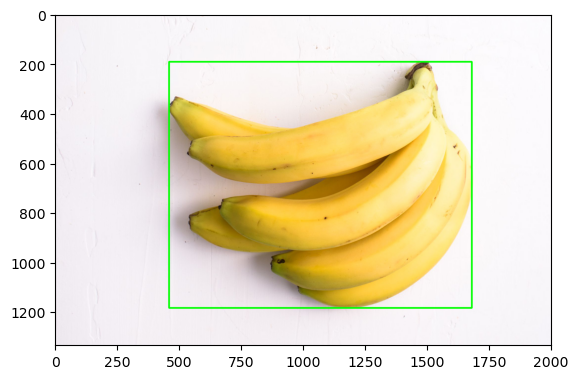

In [12]:
plt.figure()
plt.imshow(result)
plt.show()